In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.datasets import fetch_california_housing
import seaborn as sns

In [44]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [45]:
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size = 0.2, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
lr.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [46]:
# смотрим разницу факта и прогноза для линейной регрессии
result_lr = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_lr.columns = ['y_test', 'y_pred']
result_lr.head()

,y_test,y_pred
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


In [47]:
rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False)
rmse

0.7455813830127762

In [48]:
rmse = mean_squared_error(y_train, lr.predict(X_train), squared = False)
rmse

0.7196757085831575

In [49]:
r2= r2_score(y_test, lr.predict(X_test))
r2

0.575787706032451

In [50]:
r2= r2_score(y_train, lr.predict(X_train))
r2

0.6125511913966952

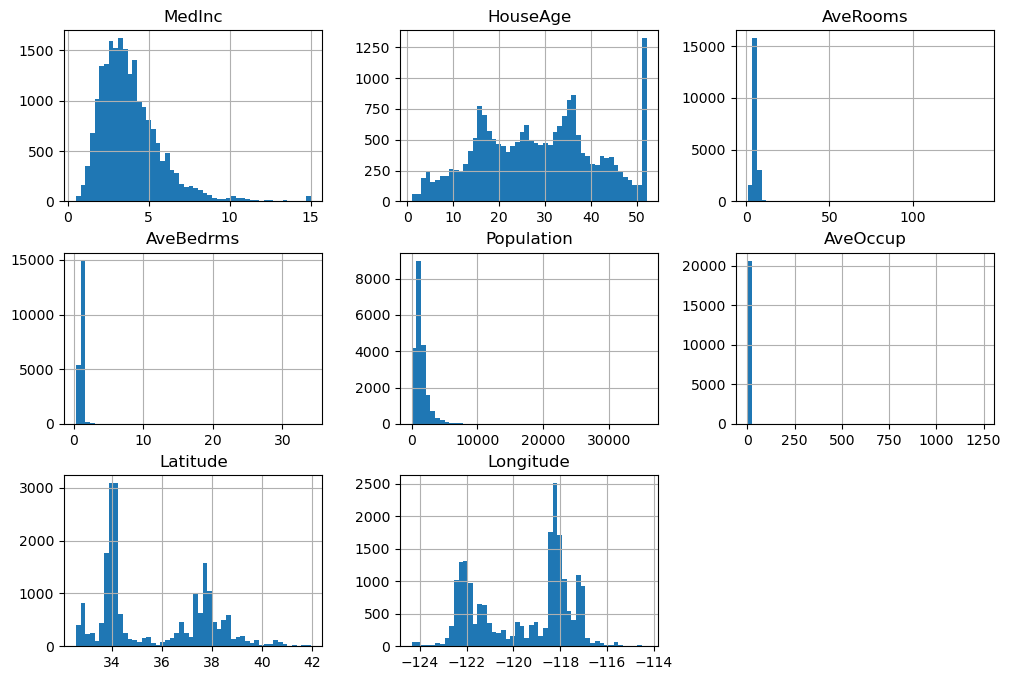

In [51]:
california_housing.data.hist(bins=50, figsize=(12,8))
plt.show()

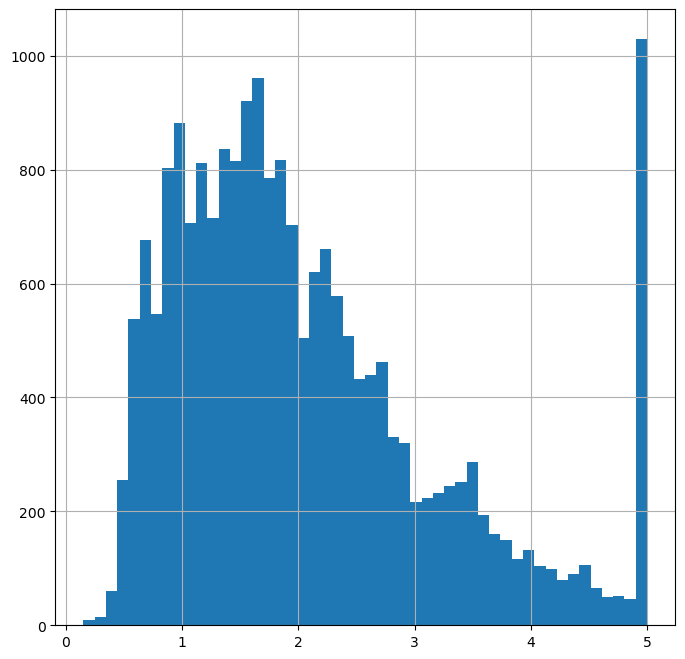

In [52]:
california_housing.target.hist(bins=50, figsize=(8,8))
plt.show()

<Axes: >

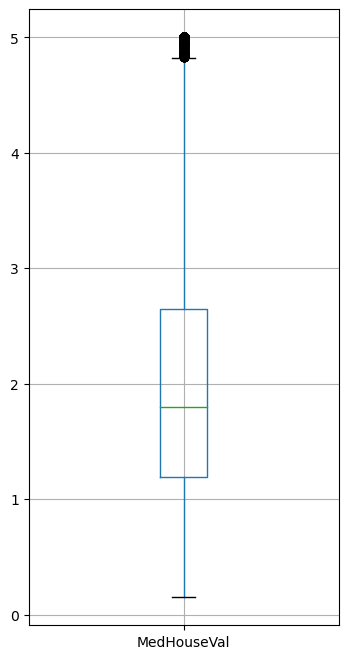

In [53]:
#Видим выбросы
pd.DataFrame(california_housing.target).boxplot(figsize=(4, 8))

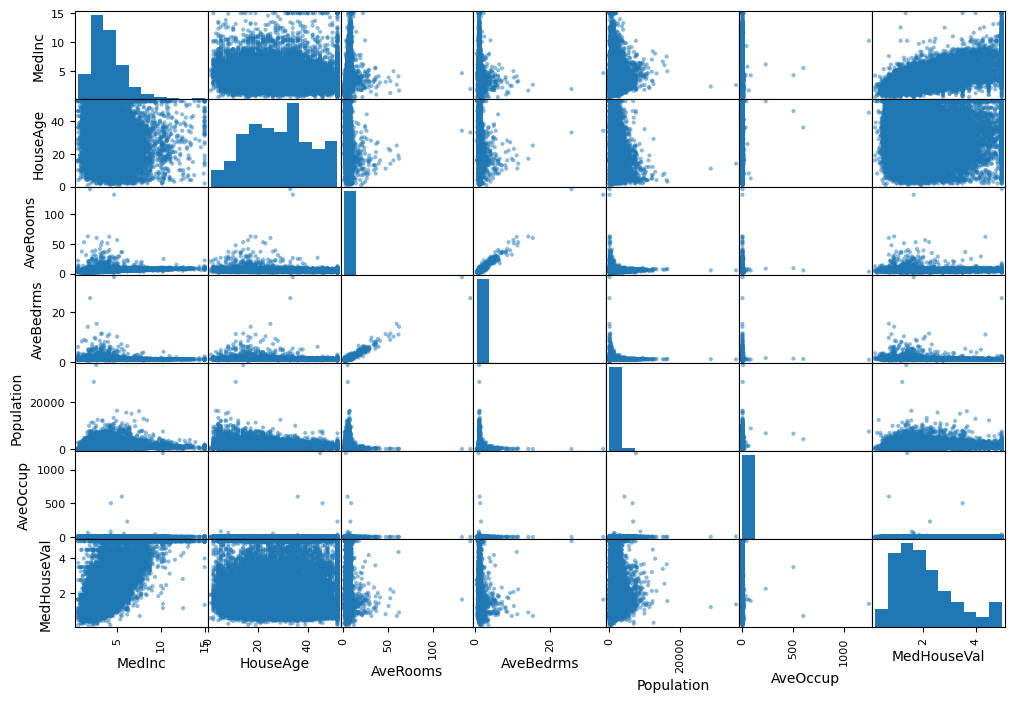

In [54]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(california_housing.frame[attributes], figsize=(12,8))
plt.show()

<Axes: >

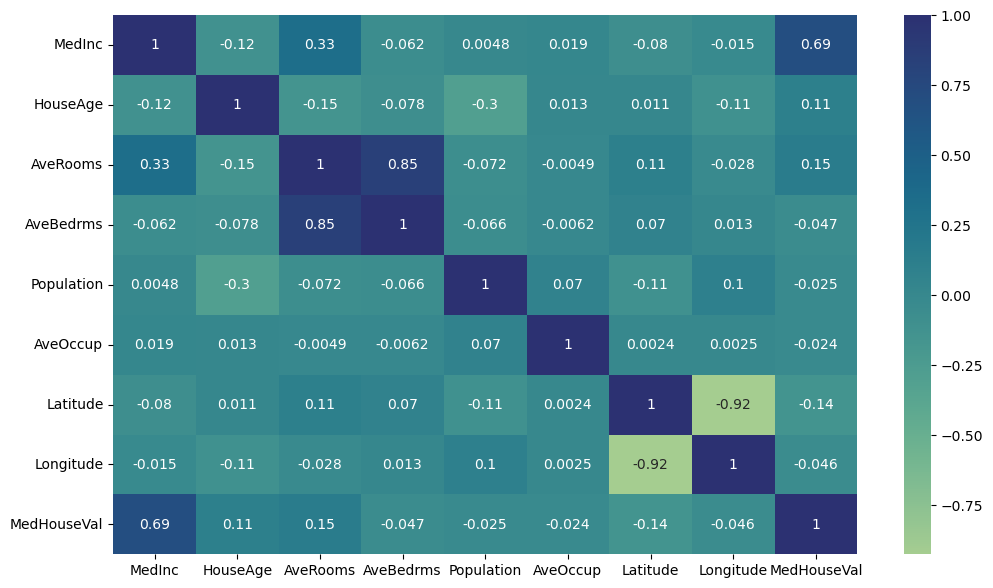

In [55]:
plt.figure(figsize=(12,7))
sns.heatmap(pd.concat([california_housing.data, california_housing.target], axis=1).corr(), cmap='crest', annot=True)

In [56]:
#Исключаем столбцы Longitude, AveRooms чтобы не было мультиколлинеарности
xy1 = california_housing.frame[['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(xy1.loc[:, ~xy1.columns.isin(['MedHouseVal'])], xy1['MedHouseVal'], test_size=0.2, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
lr.coef_

array([ 4.31731581e-01,  1.84584524e-02,  6.93808432e-02,  2.60920083e-05,
       -4.21067747e-03, -4.79597609e-02])

In [57]:
# смотрим разницу факта и прогноза для линейной регрессии
result_lr = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_lr.columns = ['y_test', 'y_pred']
result_lr.head()

,y_test,y_pred
0,0.47700,1.026387
1,0.45800,1.551253
2,5.00001,2.237767
3,2.18600,2.725209
4,2.78000,2.045713


In [58]:
#Ошибка возросла, что скорее всего говорит о том, что у нас не было проблемы переобучения, и столбцы не нужно было удалять судя по коэффициентам
rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False)
rmse

0.8068376614659282

In [60]:
rmse = mean_squared_error(y_train, lr.predict(X_train), squared = False)
rmse

0.7980627058140952

In [61]:
r2= r2_score(y_test, lr.predict(X_test))
r2

0.5032184434254285

In [62]:
r2= r2_score(y_train, lr.predict(X_train))
r2

0.5235529149156704

<Axes: >

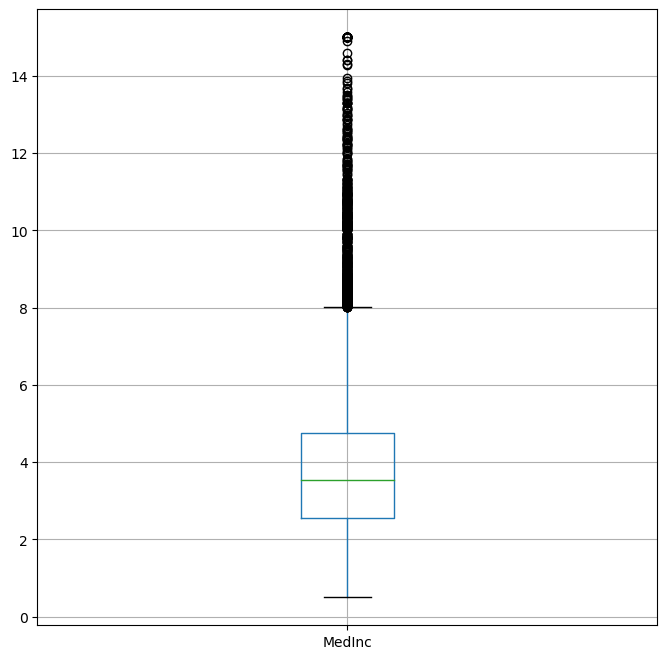

In [63]:
#Видим выбросы
pd.DataFrame(xy1['MedInc']).boxplot(figsize=(8, 8))

<Axes: >

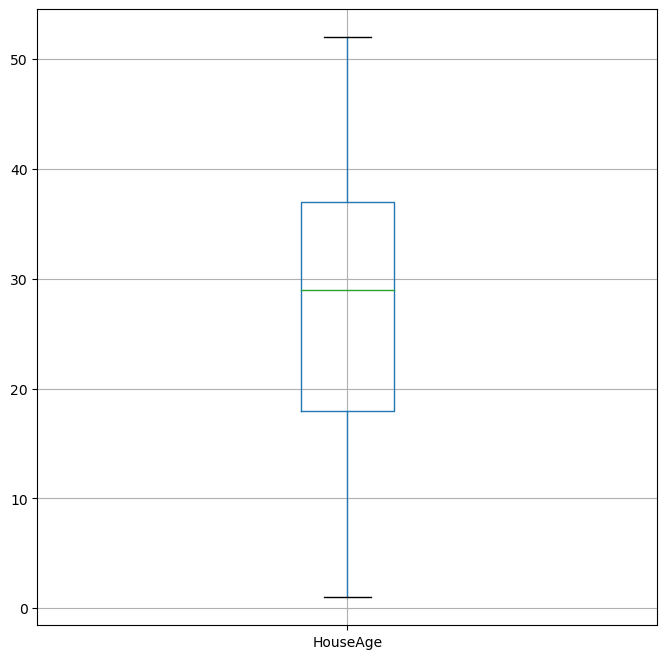

In [64]:
#Нет выбросов
pd.DataFrame(xy1['HouseAge']).boxplot(figsize=(8, 8))

<Axes: >

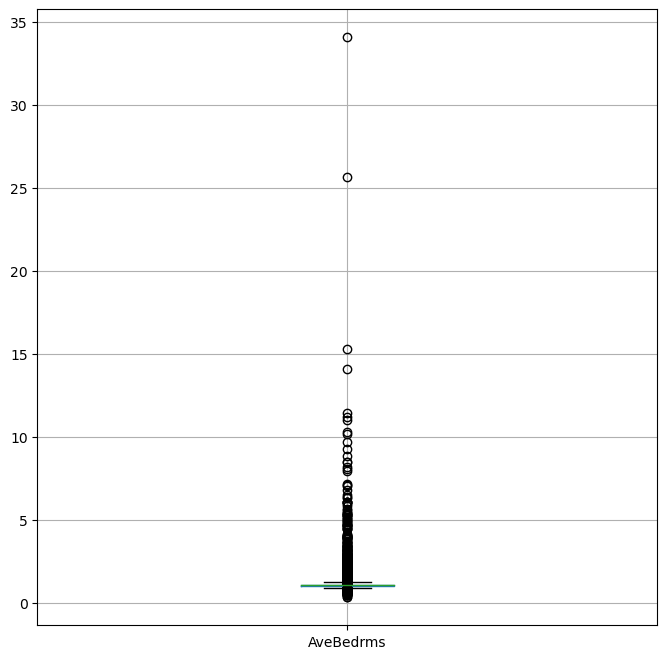

In [65]:
#Куча выбросов
pd.DataFrame(xy1['AveBedrms']).boxplot(figsize=(8, 8), fontsize=10)

<Axes: >

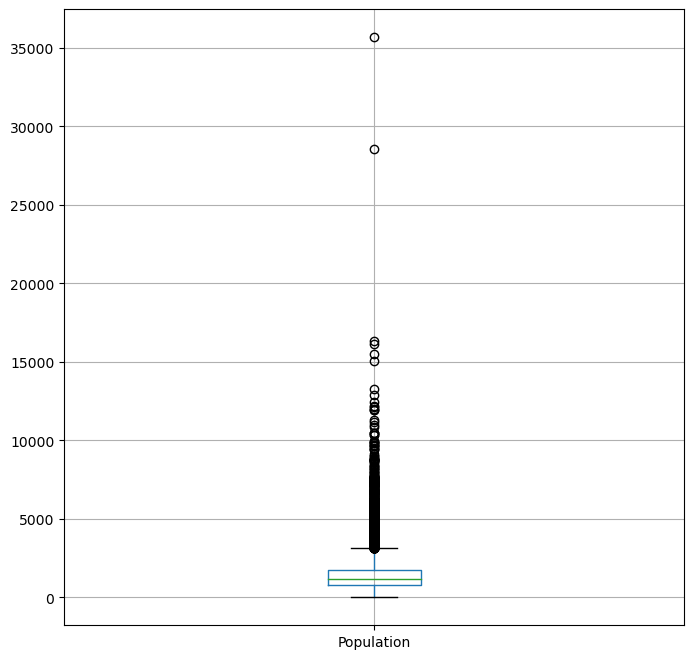

In [66]:
#Куча выбросов
pd.DataFrame(xy1['Population']).boxplot(figsize=(8, 8))

<Axes: >

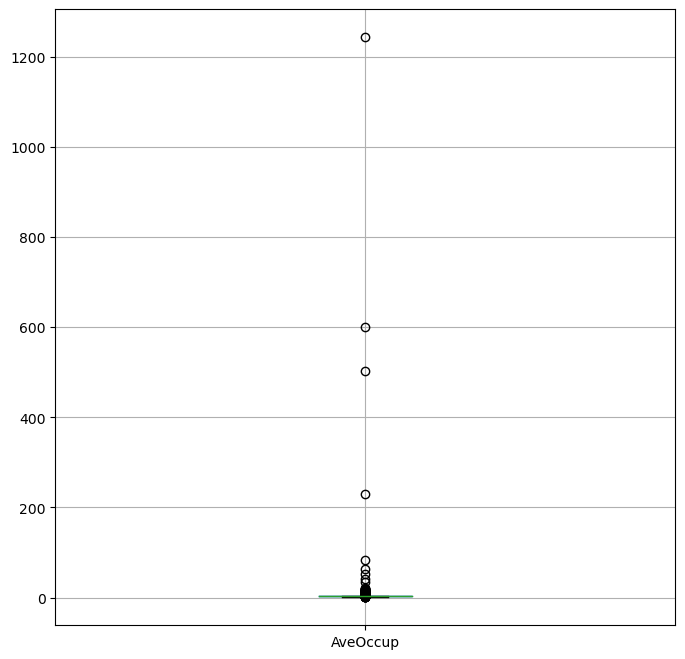

In [67]:
#Куча выбросов
pd.DataFrame(xy1['AveOccup']).boxplot(figsize=(8, 8))

<Axes: >

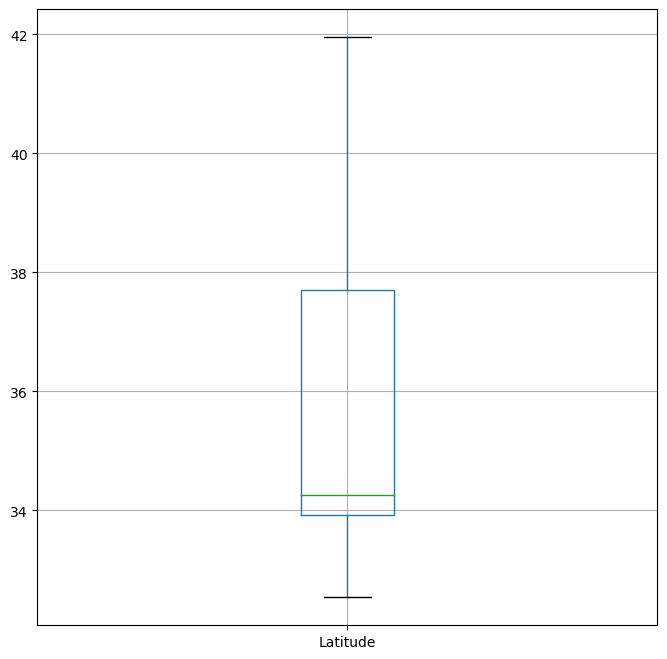

In [68]:
#Нет выбросов
pd.DataFrame(xy1['Latitude']).boxplot(figsize=(8, 8))

In [69]:
#Уберем строки с выбросами
xy2 = xy1[(xy1['MedInc']<=8) & (xy1['AveBedrms']<=5) & (xy1['Population']<=3150) & (xy1['AveOccup']<=18) & (xy1['MedHouseVal']<=4.75)]
X_train, X_test, y_train, y_test = train_test_split(xy2.loc[:, ~xy2.columns.isin(['MedHouseVal'])], xy2['MedHouseVal'], test_size=0.2, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
lr.coef_

array([ 4.19392413e-01,  1.70898388e-02,  4.71308824e-02,  1.19437555e-04,
       -2.84923485e-01, -5.45287693e-02])

In [70]:
# смотрим разницу факта и прогноза для линейной регрессии
result_lr = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_lr.columns = ['y_test', 'y_pred']
result_lr.head()

,y_test,y_pred
0,1.911,2.074122
1,2.133,1.842516
2,1.519,1.698142
3,2.822,2.318890
4,1.470,1.992040


In [71]:
#Ошибка уменьшилась
rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False)
rmse

0.653531937294397

In [72]:
rmse = mean_squared_error(y_train, lr.predict(X_train), squared = False)
rmse

0.661690059407297

In [73]:
r2= r2_score(y_test, lr.predict(X_test))
r2

0.5029588111373327

In [74]:
r2= r2_score(y_train, lr.predict(X_train))
r2

0.5046791148980629

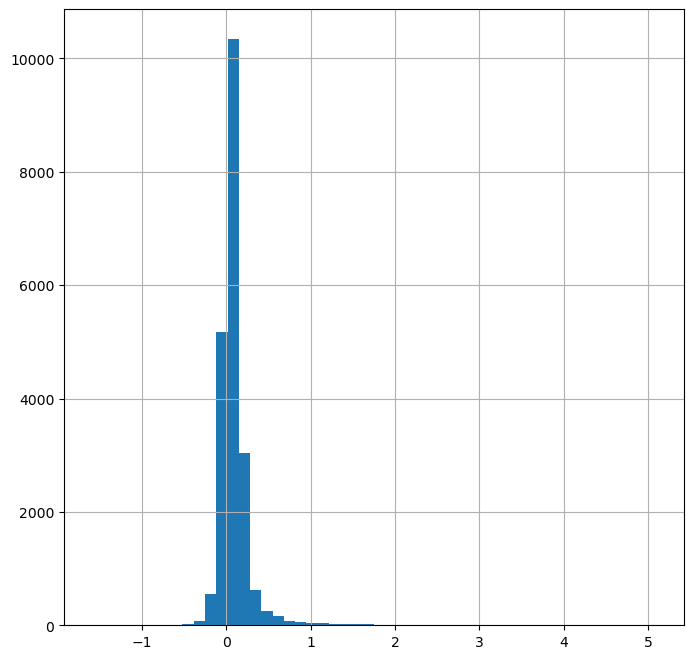

In [75]:
np.log2(xy1['AveBedrms']).hist(bins=50, figsize=(8,8))
plt.show()

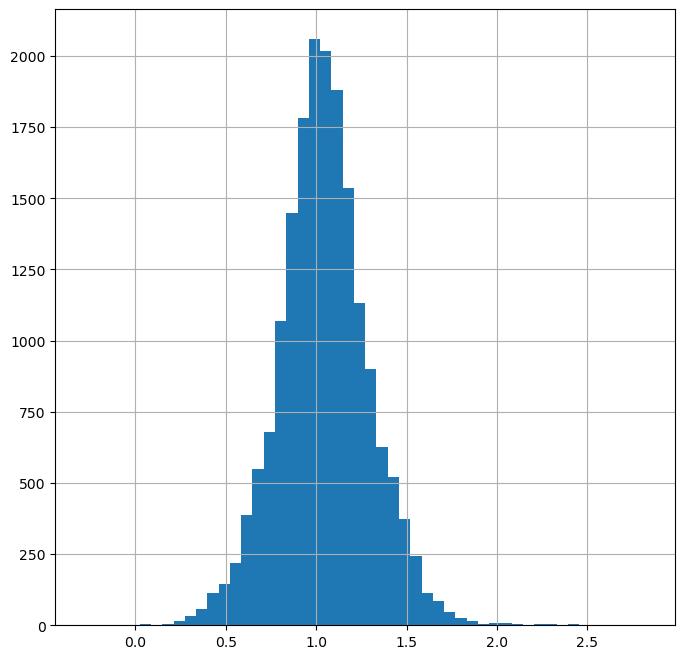

In [76]:
np.log(xy2['AveOccup']).hist(bins=50, figsize=(8,8))
plt.show()

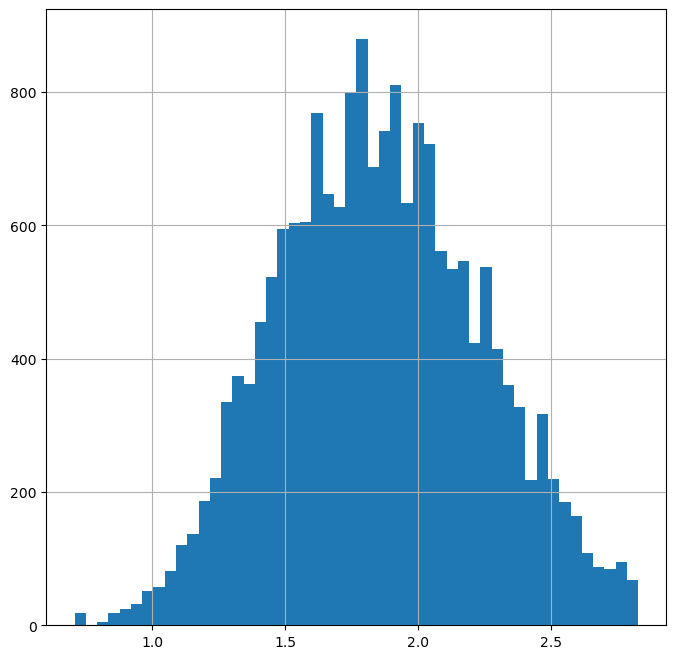

In [77]:
np.sqrt(xy2['MedInc']).hist(bins=50, figsize=(8,8))
plt.show()


In [78]:
xy3 = xy2
xy3['AveBedrms'] = np.log(xy2['AveBedrms'])
xy3['AveOccup'] = np.log(xy2['AveOccup'])
xy3['MedInc'] = np.sqrt(xy2['MedInc'])
X_train, X_test, y_train, y_test = train_test_split(xy3.loc[:, ~xy3.columns.isin(['MedHouseVal'])], xy3['MedHouseVal'], test_size=0.2, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
lr.coef_

C:\Users\Игнат\AppData\Local\Temp\ipykernel_21820\3328747380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy3['AveBedrms'] = np.log(xy2['AveBedrms'])
C:\Users\Игнат\AppData\Local\Temp\ipykernel_21820\3328747380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy3['AveOccup'] = np.log(xy2['AveOccup'])
C:\Users\Игнат\AppData\Local\Temp\ipykernel_21820\3328747380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

array([ 1.57635612e+00,  1.70211436e-02,  1.03715498e-01,  1.29027647e-04,
       -1.06297432e+00, -5.63430088e-02])

In [79]:
# смотрим разницу факта и прогноза для линейной регрессии
result_lr = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_lr.columns = ['y_test', 'y_pred']
result_lr.head()

,y_test,y_pred
0,1.911,2.033516
1,2.133,1.891916
2,1.519,1.713854
3,2.822,2.443233
4,1.470,1.979269


In [80]:
rmse = mean_squared_error(y_test, lr.predict(X_test), squared = False)
rmse

0.6545162439372035

In [81]:
rmse = mean_squared_error(y_train, lr.predict(X_train), squared = False)
rmse

0.6566463550526951

In [82]:
r2= r2_score(y_test, lr.predict(X_test))
r2

0.5014604624042244

In [83]:
r2= r2_score(y_train, lr.predict(X_train))
r2

0.512201460623184

In [84]:
pd.set_option("max_colwidth", 500)
relult = (pd.DataFrame({'Модель': ['1', '2', '3', '4'], 'RMSE': ['0.75', '0.80', '0.65', '0.65'], 'R2': ['0.58', '0.50', '0.50', '0.50'], 'Признаки и описание': ['Обучили модель на данных как есть',
                       'Убрали признаки Longitude и AveRooms, т.к была корреляция с другими признаками, но только ухудшили модель ~ на 7%',
                       'Удалили выбросы из модели 2, улучшили модель на ~23%',
                       'Взяли логарифм признака AveBedrms и AveOccup, корень MedInc из модели 3. Качество метрики улучшилось в пределах статистической погрешности']}))
relult

,Модель,RMSE,R2,Признаки и описание
0,1,0.75,0.58,Обучили модель на данных как есть
1,2,0.80,0.50,"Убрали признаки Longitude и AveRooms, т.к была корреляция с другими признаками, но только ухудшили модель ~ на 7%"
2,3,0.65,0.50,"Удалили выбросы из модели 2, улучшили модель на ~23%"
3,4,0.65,0.50,"Взяли логарифм признака AveBedrms и AveOccup, корень MedInc из модели 3. Качество метрики улучшилось в пределах статистической погрешности"
